In [1]:
# We're going to use this notebook to just show off a bit of ML-related coding skills.
# we're going to run our basic imports for this: numpy, sklearn, and the mnist set, as well as plotting tools
import numpy as np
import sklearn as skl
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
from keras.datasets import mnist

In [2]:
# From the mnist dataset, we're going to import a training and test set
(train_X, train_y), (test_X, test_y) = mnist.load_data()


In [3]:
# Let's check out some basic info about our training and test sets:
print(train_X.shape)
print(train_y.shape)
# From this, we see that our training examples have 60k 28x28 images and their associated labels.
# We need to flatten out our training and testing sets.
train_X = train_X.reshape(train_X.shape[0],28**2)
test_X = test_X.reshape(test_X.shape[0],28**2)


(60000, 28, 28)
(60000,)


In [4]:
# I don't recall if the MNIST set is preprocessed or not. 
# So we will go ahead and preprocess it with mean removal and variance scaling.
scaler = skl.preprocessing.StandardScaler()
train_X_sc = scaler.fit_transform(train_X)
# We'll do the same for the test set:
test_X_sc = scaler.fit_transform(test_X)


 The first classifier we'll check is a simple linear classifier. These run quickly and sometimes work well. 
 As we know that the labels should always be integers, we will round the label outputs.
 We will not be performing any kind of dimension reduction to get at the more important components of the data
 and will expect a pretty poor fit here, as the features will tend to covary, and the model may tend to overfit.

The GOF score of this fit is:  0.61603856192773


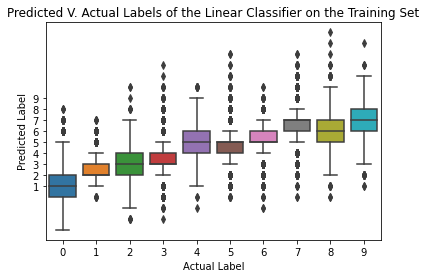

The accuracy of this fit is:  0.22516666666666665


In [5]:
from sklearn import linear_model

LR_model = linear_model.LinearRegression()
LR_model.fit(train_X_sc,train_y)
print("The GOF score of this fit is: ", LR_model.score(train_X_sc,train_y))
label_pred = np.round(LR_model.predict(train_X_sc))

sns.boxplot(train_y,label_pred)
plt.title("Predicted V. Actual Labels of the Linear Classifier on the Training Set")
plt.ylabel("Predicted Label")
plt.xlabel("Actual Label")
plt.yticks(np.arange(1,10,1))
plt.show()
print("The accuracy of this fit is: ", np.mean(train_y==label_pred))


We can clearly see that the spread about each label is very large and while some numbers (see 1 and 4) have medians at their target values, there are a large number of outliers. With such poor accuracy on a training set, we expect this model to perform equally poorly on a test set.

Although the fit to the training data is a poor one and we have little hope of capturing the test data in any meaningful way, we will quantify this result:

The GOF score of this fit is:  0.61603856192773


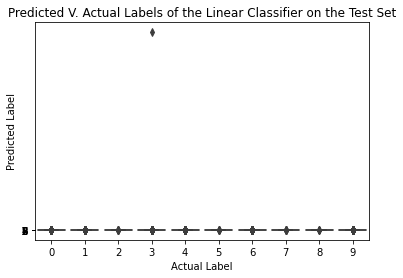

The accuracy of this fit is:  0.0


In [6]:
print("The GOF score of this fit is: ", LR_model.score(train_X_sc,train_y))
label_pred = np.round(LR_model.predict(test_X_sc))

sns.boxplot(test_y,label_pred)
plt.title("Predicted V. Actual Labels of the Linear Classifier on the Test Set")
plt.ylabel("Predicted Label")
plt.xlabel("Actual Label")
plt.yticks(np.arange(1,10,1))
plt.show()
print("The accuracy of this fit is: ", np.mean(test_y==label_pred))


This exceptionally poor fitting of the test data suggests some overfitting of unimportant features for the training data. Therefore, we will move on to a more complex linear classifier developed to address issues like these: a ridge regression model. The ridge classifier we choose includes cross-validation on a number of penalties that may be imposed on coefficients. This should allow a better fit than if we were to simple guess at penalties.

The GOF score for this regression is:  0.6161201187462169
The accuracy of this fit is:  0.2265


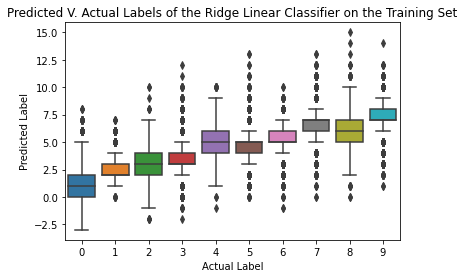

In [7]:
# let's try a more complex linear model
ridge = linear_model.RidgeCV(alphas = np.logspace(-10,0,20))
ridge.fit(train_X_sc,train_y)
print("The GOF score for this regression is: ", ridge.score(train_X_sc,train_y))
label_pred_ridge = np.round(ridge.predict(train_X_sc))

sns.boxplot(train_y,label_pred_ridge)
plt.title("Predicted V. Actual Labels of the Ridge Linear Classifier on the Training Set")
plt.ylabel("Predicted Label")
plt.xlabel("Actual Label")

print("The accuracy of this fit is: ", np.mean(label_pred_ridge==train_y))


Again we see extremely poor performance on the training set. However, the classifier's penalties on coefficient size should allow a better fit to tet data. 

The GOF score for this regression is:  0.6230985236031041
The accuracy of this fit is:  0.2212


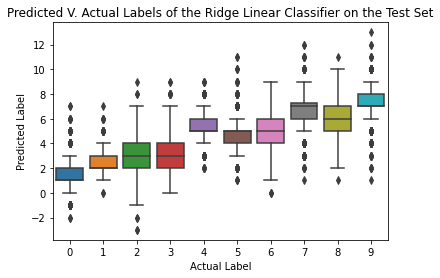

In [8]:
ridge = linear_model.RidgeCV(alphas = np.logspace(-10,0,20))
ridge.fit(train_X_sc,train_y)
print("The GOF score for this regression is: ", ridge.score(test_X_sc,test_y))
label_pred_ridge = np.round(ridge.predict(test_X_sc))

sns.boxplot(test_y,label_pred_ridge)
plt.title("Predicted V. Actual Labels of the Ridge Linear Classifier on the Test Set")
plt.ylabel("Predicted Label")
plt.xlabel("Actual Label")

print("The accuracy of this fit is: ", np.mean(label_pred_ridge==test_y))


As anticipated, we see a fit of the test set that much more closely resembles the (poor) fit of the training data. Although a poor fit, this example does illustrate some of the ridge classifier's strength over a simple linear classifier.

As noted above, one of the difficulties of performing linear analysis on this set, up to this point, has been a lack of dimension reduction. We will, therefore, be making one final attempt at linear classification using dimension reduction. To do so, we will employ Linear Discrimination Analysis. The LDA method performs dimension reduction by any of 3 different means and using some number of dimensions that are either set by the user or set by default. In order to maximize our results, we will perform Singular Value Decomposition on the training set to find those components that will provide the most relevant results. We will be using an approximation to the truncated SVD decomposition method that significantly improves on computation time while sacrificing minimal accuracy.

In [9]:
from sklearn.utils.extmath import randomized_svd
u, s, vt = randomized_svd(train_X_sc, n_components = 9)
print("There are ", np.shape(s[s>=np.max(s)*0.75]), "components with singular values greater than or equal to 75% of the maximum singular value")

There are  (3,) components with singular values greater than or equal to 75% of the maximum singular value


The GOF score for this fit is:  0.8714833333333334
The accuracy of this fit is:  0.8714833333333334


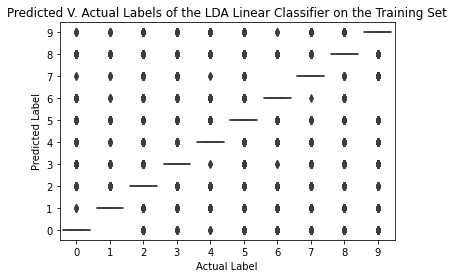

In [10]:
# By default, the number of components the classifier would use is 9 (number of classes - 1).
# We will use 3 instead.

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA = LinearDiscriminantAnalysis(n_components = 3)
LDA.fit(train_X_sc,train_y)
print("The GOF score for this fit is: ", LDA.score(train_X_sc,train_y))
label_pred_LDA = LDA.predict(train_X_sc)

sns.boxplot(train_y,label_pred_LDA)
plt.title("Predicted V. Actual Labels of the LDA Linear Classifier on the Training Set")
plt.ylabel("Predicted Label")
plt.xlabel("Actual Label")
plt.yticks(np.arange(0,10,1))

print("The accuracy of this fit is: ", np.mean(label_pred_LDA==train_y))


This is already a significant improvement on our previous classifiers, with only outliers being misclassified. However, it's clear there are still a large number of outliers. Now we will check it against the test set. 

The GOF score for this fit is:  0.873
The accuracy of this fit is:  0.873


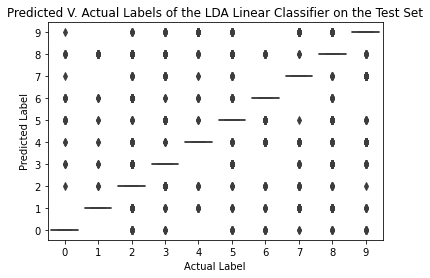

In [11]:

print("The GOF score for this fit is: ", LDA.score(test_X_sc,test_y))
label_pred_LDA = LDA.predict(test_X_sc)

sns.boxplot(test_y,label_pred_LDA)
plt.title("Predicted V. Actual Labels of the LDA Linear Classifier on the Test Set")
plt.ylabel("Predicted Label")
plt.xlabel("Actual Label")
plt.yticks(np.arange(0,10,1))

print("The accuracy of this fit is: ", np.mean(label_pred_LDA==test_y))


Somewhat to my surprise, this method offered a better fit of the test set than the training set, with fewer outliers and a 0.15% accuracy improvement. However, suppose the nuclear launch codes depend on our ability to classify MNIST. To the end of minimizing our chances of erroneously destroying the planet, let us try to improve on these methods.

From here, we can move on to a simpler non-linear classifier: the Nearest Neighbor classifier. The simple concept is to match each test set's predicted label to the label of the training example from which it is separated in Euclidean space by a minimal vector.

We will start with mapping to the single nearest neighbor. Although it is possible to perform this operation using NearestNeighbors, we will instead use the KNeighborsClassifier for its built in R^2 scoring method, which provides a more direct comparison between it and previous methods. 

The GOF score for this regression is:  0.9427
The Accuracy of this Classifier is:  0.9427


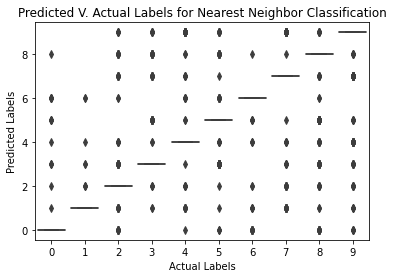

In [12]:
from sklearn.neighbors import KNeighborsClassifier

kneigh = KNeighborsClassifier(n_neighbors=1)
kneigh.fit(train_X_sc, train_y)
print("The GOF score for this regression is: ",kneigh.score(test_X_sc,test_y))

y_lab = kneigh.predict(test_X_sc)
y_actual = test_y
print("The Accuracy of this Classifier is: ", np.mean(y_lab==y_actual))
sns.boxplot(y_actual,y_lab)
plt.title("Predicted V. Actual Labels for Nearest Neighbor Classification")
plt.ylabel("Predicted Labels")
plt.xlabel("Actual Labels")
plt.show()

We will make one further modification to our classifier for this notebook. Rather than relying on a single nearest neighbor or a small set of nearest neighbors, we will represent each class by its centroid, equivalent to the center of mass of a distributed body. From there, we will match each test example to the centroid to which it is closest in euclidean space. This should make the classifier somewhat less sensitive to outlier repreesntations in the training set. This may reduce error where examples in the training set are generally tightly clustered. However, if there are significant outliers in the training set, as we might expect based on the results of out KNeighbors approach, it might introduce errors by misclassifying outliers in the test set.

The GOF score for this classifier is:  0.8089
The accuracy of this Classifier is:  0.8089


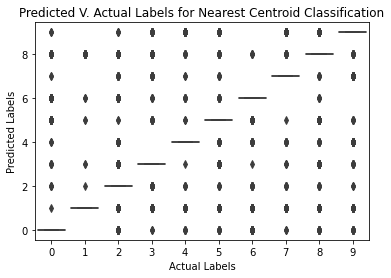

In [13]:
from sklearn.neighbors import NearestCentroid

NC = NearestCentroid()
NC.fit(train_X_sc, train_y)
NC_lab_pred = NC.predict(test_X_sc)
print("The GOF score for this classifier is: ", NC.score(test_X_sc,test_y))

y_actual = test_y
print("The accuracy of this Classifier is: ", np.mean(NC_lab_pred==y_actual))
sns.boxplot(y_actual,NC_lab_pred)
plt.title("Predicted V. Actual Labels for Nearest Centroid Classification")
plt.ylabel("Predicted Labels")
plt.xlabel("Actual Labels")
plt.show()


As anticipated, we see an increased error with the nearest centroid method. So, for accurate classification, the single nearest neighbor is the best alternative explored among these. 